# HW4 Support Vector Machine and Decision Trees

# Due on 11/25 23:59 pm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW3, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [3]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [4]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel with usual steps

In [5]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [6]:
from sklearn.model_selection import train_test_split
target = df['had_affair']
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('had_affair',axis=1), 
                                                    df['had_affair'], train_size=0.80, 
                                                    random_state=101)

In [7]:
from sklearn.metrics import classification_report, accuracy_score
educ_children = df[['educ', 'children']].as_matrix
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),2))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.67      1274

Accuracy Score: 0.71 


In [8]:
#import the model from sklearn import svm, create the SVC object 
#model = svm.SVC()
#Call Train test split
#print out model performance

### Question 2. Now try different value of C-parameter and rerun your model

In [9]:
model = svm.SVC(kernel='linear', C=2**5)
model.fit(X_train,Y_train)
print (model)
# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),2))

SVC(C=32, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.66      1274

Accuracy Score: 0.71 


In [10]:
model = svm.SVC(kernel='linear', C=4**-5)
model.fit(X_train,Y_train)
print(model)
# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),2))

SVC(C=0.0009765625, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       850
           1       0.67      0.01      0.02       424

    accuracy                           0.67      1274
   macro avg       0.67      0.50      0.41      1274
weighted avg       0.67      0.67      0.54      1274

Accuracy Score: 0.67 


### Question 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2

In [11]:
model = svm.SVC(kernel='rbf', C=2**5, gamma=2**-5)
model.fit(X_train,Y_train)
print(model)
# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

SVC(C=32, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       850
           1       0.56      0.35      0.43       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

Accuracy Score: 0.692 


In [12]:
model = svm.SVC(kernel='rbf', C=1, gamma=2**-5)
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       850
           1       0.64      0.31      0.42       424

    accuracy                           0.71      1274
   macro avg       0.68      0.61      0.61      1274
weighted avg       0.70      0.71      0.68      1274

Accuracy Score: 0.711 


In [13]:
model = svm.SVC(kernel='rbf', C=2**-5, gamma=0.1)
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       850
           1       0.00      0.00      0.00       424

    accuracy                           0.67      1274
   macro avg       0.33      0.50      0.40      1274
weighted avg       0.45      0.67      0.53      1274

Accuracy Score: 0.667 


In [14]:
model = svm.SVC(kernel='rbf',C=1, gamma=0.1)
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       850
           1       0.59      0.31      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.60      0.60      1274
weighted avg       0.68      0.70      0.67      1274

Accuracy Score: 0.7 


In [15]:
model = svm.SVC(kernel='rbf', C=2**5, gamma=1)
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       850
           1       0.47      0.33      0.39       424

    accuracy                           0.65      1274
   macro avg       0.59      0.57      0.57      1274
weighted avg       0.63      0.65      0.64      1274

Accuracy Score: 0.653 


In [16]:
model = svm.SVC(kernel='rbf', C=1, gamma=1)
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77       850
           1       0.47      0.24      0.32       424

    accuracy                           0.66      1274
   macro avg       0.58      0.55      0.55      1274
weighted avg       0.62      0.66      0.62      1274

Accuracy Score: 0.658 


In [17]:
model = svm.SVC(kernel='rbf',C=2**5, gamma=2)
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       850
           1       0.42      0.19      0.26       424

    accuracy                           0.64      1274
   macro avg       0.55      0.53      0.51      1274
weighted avg       0.59      0.64      0.60      1274

Accuracy Score: 0.642 


In [18]:
model = svm.SVC(kernel='rbf',C=1, gamma=2)
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       850
           1       0.40      0.16      0.23       424

    accuracy                           0.64      1274
   macro avg       0.54      0.52      0.50      1274
weighted avg       0.59      0.64      0.59      1274

Accuracy Score: 0.642 


### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters?

#### For the rbf:
The C-parameter that gave a better accuracy score was 1, merely a larger number in general gave a better score for both rbf and linear. This means that there was more room for misclassification, than the higher C-parameter values. Lastly, the gamma parameter that gives the higher accuracy score, are the ones very close to zero. However, this also means our model is underfitting. 
model = svm.SVC(kernel='rbf', C=1, gamma=2**-5)

#### For the linear:
The linear model with the C-parameter being equal to 32 gave a good accuracy score. Which means that we had a lot less misclassifcation, but we can also be overfitting our model.

Both accuracy scores were very close, so either of these two options would be good,

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

In [19]:
X = df.drop('had_affair',axis=1)
Y = df['had_affair']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1196  100]
 [ 447  167]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81      1296
           1       0.63      0.27      0.38       614

    accuracy                           0.71      1910
   macro avg       0.68      0.60      0.60      1910
weighted avg       0.69      0.71      0.67      1910

0.7136125654450262


### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

In [22]:
model = DecisionTreeClassifier(max_depth=2, criterion='gini')
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1171  125]
 [ 418  196]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1296
           1       0.61      0.32      0.42       614

    accuracy                           0.72      1910
   macro avg       0.67      0.61      0.62      1910
weighted avg       0.70      0.72      0.69      1910

0.7157068062827225


In [23]:
model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(X_train,y_train)


predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1171  125]
 [ 418  196]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1296
           1       0.61      0.32      0.42       614

    accuracy                           0.72      1910
   macro avg       0.67      0.61      0.62      1910
weighted avg       0.70      0.72      0.69      1910

0.7157068062827225


In [24]:
model = DecisionTreeClassifier(max_depth=3, criterion='gini')
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1196  100]
 [ 447  167]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81      1296
           1       0.63      0.27      0.38       614

    accuracy                           0.71      1910
   macro avg       0.68      0.60      0.60      1910
weighted avg       0.69      0.71      0.67      1910

0.7136125654450262


In [25]:
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(X_train,y_train)


predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1196  100]
 [ 447  167]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81      1296
           1       0.63      0.27      0.38       614

    accuracy                           0.71      1910
   macro avg       0.68      0.60      0.60      1910
weighted avg       0.69      0.71      0.67      1910

0.7136125654450262


In [26]:
model = DecisionTreeClassifier(max_depth=4, criterion='gini')
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1168  128]
 [ 418  196]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1296
           1       0.60      0.32      0.42       614

    accuracy                           0.71      1910
   macro avg       0.67      0.61      0.61      1910
weighted avg       0.69      0.71      0.68      1910

0.7141361256544503


In [27]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model.fit(X_train,y_train)


predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1172  124]
 [ 418  196]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1296
           1       0.61      0.32      0.42       614

    accuracy                           0.72      1910
   macro avg       0.67      0.61      0.62      1910
weighted avg       0.70      0.72      0.69      1910

0.7162303664921466


### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

All the values for max_depth and criterion we chose resulted in very good and similar accuracy results, therefore, I don't think they're that significant in this case. However, the best choice for max_depth is 4, while the choice for criterion, because both gini and entropy yield the exact same performance and accuracy.

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [28]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot 

features = list(df.columns[1:])
features

/Users/jazmyn/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair',
 'occ2',
 'occ3',
 'occ4',
 'occ5',
 'occ6']

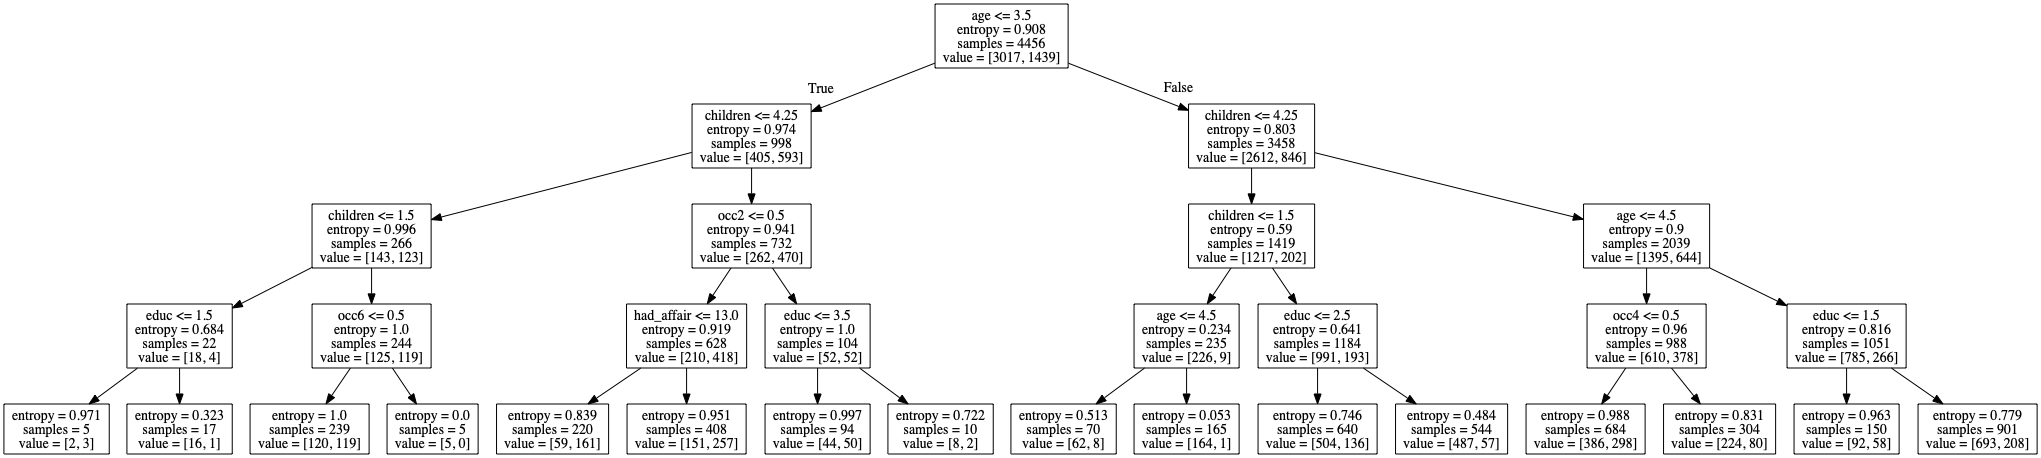

In [29]:
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

In [30]:
# Hint 
# model1 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model1.fit(X_train, y_train)
# model2 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model2.fit(X_train, y_train)
# model3 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model3.fit(X_train, y_train)
# Then display all 3 trees
# 

#dot_data = StringIO()  
#export_graphviz(model1, out_file=dot_data, feature_names=features)
#graph = pydot.graph_from_dot_data(dot_data.getvalue())
#Image(graph[0].create_png())

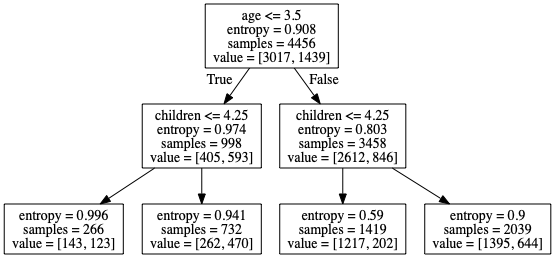

In [31]:
model1 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model1.fit(X_train, y_train)

dot_data = StringIO()  
export_graphviz(model1, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

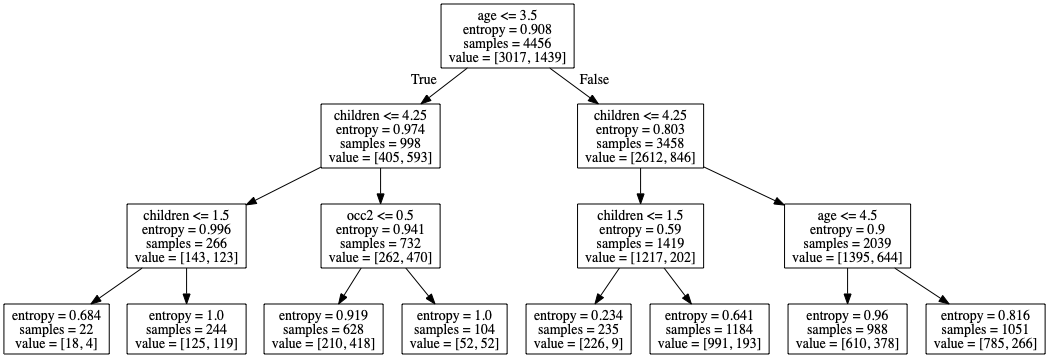

In [32]:
model1 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model1.fit(X_train, y_train)

dot_data = StringIO()  
export_graphviz(model1, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

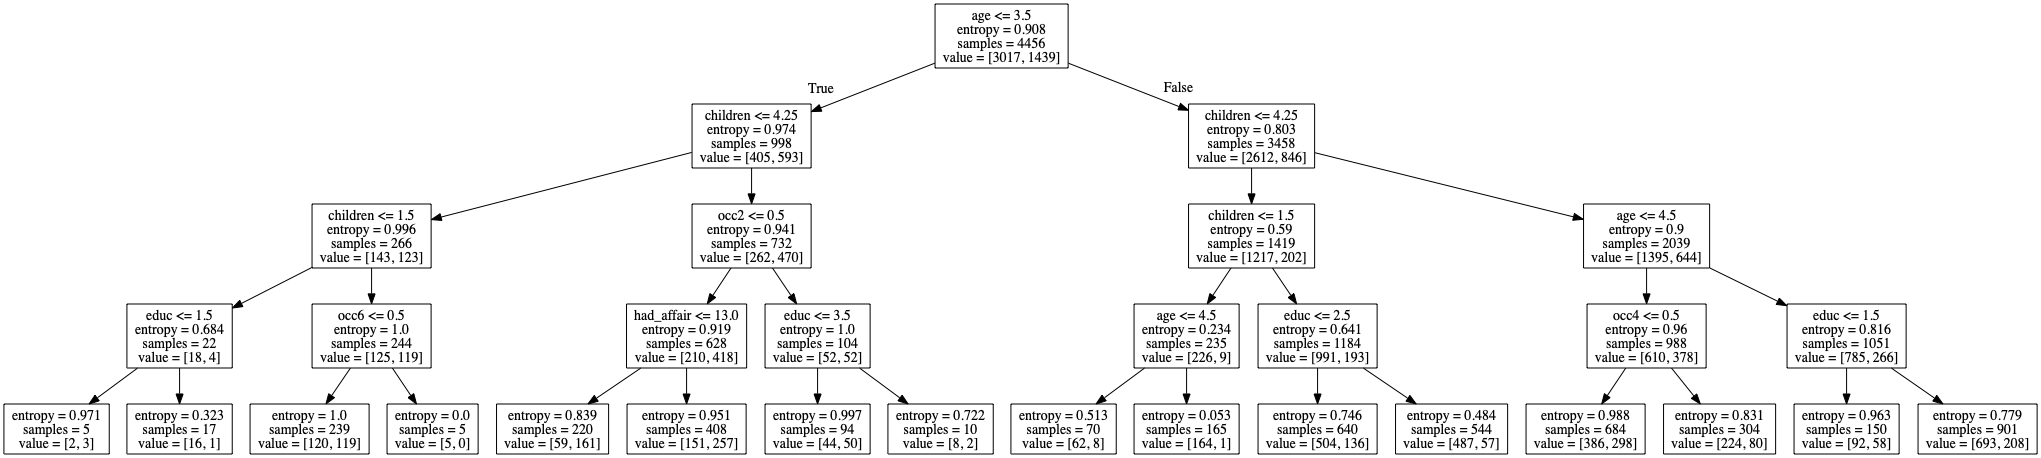

In [33]:
model1 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model1.fit(X_train, y_train)

dot_data = StringIO()  
export_graphviz(model1, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(round(accuracy_score(y_test, predictions),2))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1296
           1       0.61      0.32      0.42       614

    accuracy                           0.72      1910
   macro avg       0.67      0.61      0.62      1910
weighted avg       0.70      0.72      0.69      1910

0.72


Thank you!